In [1]:
pip install tensorflow_datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 42.9 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=01eee222b460c0c830006c379a103b486d9b55d989ecccaf43da4ec3382ce5c5
  Stored in directory: /root/.cache/pip/wheels/90/74/b1/9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobu

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

In [4]:
dataset, dataset_info = tfds.load(
    'malaria',
    with_info=True,
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    shuffle_files=True
)

2024-10-30 17:16:14.584595: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.GWCEZL_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


2024-10-30 17:17:08.915469: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 17:17:09.205261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 17:17:09.205525: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
dataset

[<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>]

In [6]:
train = dataset[0]
val = dataset[1]
test = dataset[2]

In [7]:
list(tf.data.Dataset.range(15).as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [8]:
print(len(train))   
print(len(val))
print(len(test))

22046
2756
2756


In [7]:
for i in dataset['train'].take(1):
    print(i)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [9]:
len(dataset['train']) # verify the number of images in the dataset

27558

In [12]:
# function to get the label string from the label number
def get_label_name(label):
    if label == 0:
        return 'Parasitized'
    else:
        return 'Uninfected'

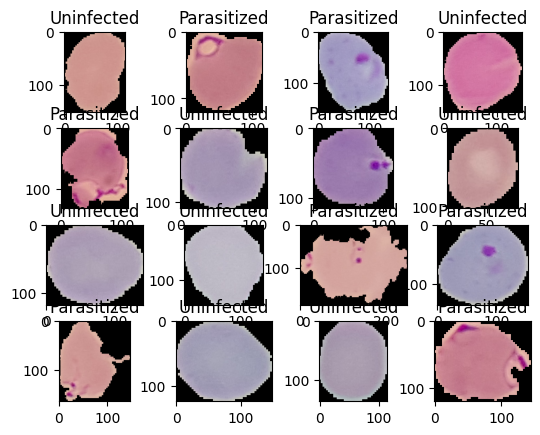

In [16]:
for i ,sample in enumerate(train.take(16)):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(sample['image'])
    plt.title(get_label_name(sample['label']))

In [46]:
im_size = 224
BATCH_SIZE = 32

In [19]:
def resize_image(input):
    image = tf.image.resize(input['image'], (im_size, im_size)) / 255.0
    return image, input['label']

In [47]:
train_dataset = train.map(resize_image).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val.map(resize_image).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test.map(resize_image).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [49]:
for image,label in train_dataset.take(1):
    # plt.imshow(image)
    print(image)
    plt.title(get_label_name(label))

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
from tensorflow.keras.layers import InputLayer, BatchNormalization

model = tf.keras.Sequential([
    InputLayer(input_shape=(im_size, im_size, 3)),
    tf.keras.layers.Conv2D(filters=12, kernel_size=4, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 221, 221, 12)      588       
                                                                 
 batch_normalization (Batch  (None, 221, 221, 12)      48        
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 12)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 107, 107, 16)      3088      
                                                                 
 batch_normalization_1 (Bat  (None, 107, 107, 16)      64        
 chNormalization)                                                
                                                      

In [57]:

model.compile(optimizer=Adam(learning_rate=0.002), loss=BinaryCrossentropy())

In [44]:
def resize_image(input):
    image = tf.image.resize(input['image'], (224, 224))
    return image, input['label']

val_dataset = val.map(resize_image)

In [59]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    verbose=1
)

Epoch 1/50
689/689 [==============================] - 22s 32ms/step - loss: 0.1712 - val_loss: 0.2538
Epoch 2/50
689/689 [==============================] - 22s 31ms/step - loss: 0.1372 - val_loss: 0.2176
Epoch 3/50
689/689 [==============================] - 22s 32ms/step - loss: 0.1123 - val_loss: 0.2698
Epoch 4/50
689/689 [==============================] - 22s 32ms/step - loss: 0.0878 - val_loss: 0.3734
Epoch 5/50
689/689 [==============================] - 22s 31ms/step - loss: 0.0660 - val_loss: 0.4655
Epoch 6/50
689/689 [==============================] - 22s 31ms/step - loss: 0.0557 - val_loss: 0.2956
Epoch 7/50
689/689 [==============================] - 22s 32ms/step - loss: 0.0360 - val_loss: 0.2823
Epoch 8/50
689/689 [==============================] - 22s 32ms/step - loss: 0.0448 - val_loss: 0.2537
Epoch 9/50
689/689 [==============================] - 22s 31ms/step - loss: 0.0271 - val_loss: 0.3688
Epoch 10/50
689/689 [==============================] - 22s 32ms/step - loss: 0.033

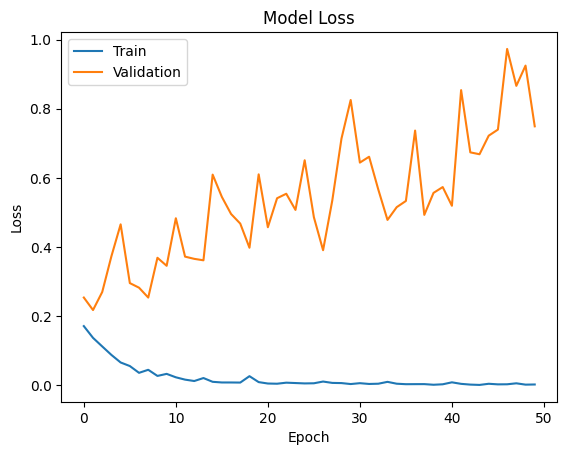

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [62]:
model.evaluate(test_dataset)

87/87 [==============================] - 1s 11ms/step - loss: 0.5946


0.5945832133293152

In [64]:
def parasite_or_not(x):
    if x >= 0.5:
        return 'Parasitized'
    else:
        return 'Uninfected'

In [66]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 0s 77ms/step


1.0

1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


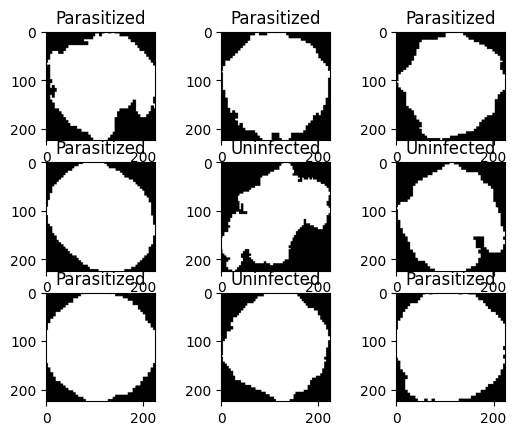

In [ ]:
for image, label in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i])
        plt.title(parasite_or_not(model.predict(image)[i][0]))

In [70]:
model.save('malaria_model')

INFO:tensorflow:Assets written to: malaria_model/assets


INFO:tensorflow:Assets written to: malaria_model/assets


In [ ]:
class lenetmodel:
    def __init__(self,filters,kernal_size,strides,padding,activation,poolsize):
        seef
